In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
import pandas as pd
import operator
from skimage import io, img_as_float
from scipy.interpolate import Rbf
from matplotlib import cm

In [2]:
%matplotlib inline

In [3]:
path = "./train"
data_paths=[]
dirs_number={}
for d, dirs, files in os.walk(path):
    for file in files:
        listok = os.listdir(d)
        data_paths.append(len(listok))
        #count = dirs_number.get(d,0)
        #dirs_number[d].append(1)
data_paths = np.array(data_paths).astype(float)
data_paths /= sum(data_paths)
len(data_paths)


700

In [8]:
dirs_number={}
for d, dirs, files in os.walk(path):
    for d in dirs:
        listok= os.listdir(path+"/"+d)
        dirs_number[d]= len(listok)

In [9]:
#sorted_vocab =  sorted(dirs_number, key=dirs_number.get, reverse=True)
sorted_x = sorted(dirs_number.items(), key=operator.itemgetter(1))
sorted_x[80]

[('crocodile', 350), ('clock', 350)]

LinAlgError: singular matrix

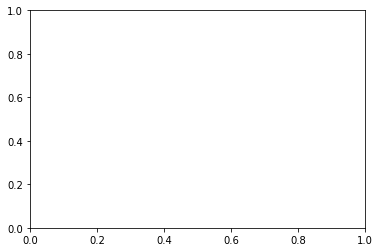

In [10]:
pd.DataFrame(data_paths).plot(kind='density')

In [11]:
len([name for name in os.listdir('.') if os.path.isfile(name)])


7

In [12]:
sizesX = []
sizesY = []
small_sizesX = []
small_sizesY = []
once_sizesX = []

for d,dirs,files in os.walk(path):
    for filename in files:
        if filename.split('.')[1] != 'svg':
            img = io.imread(d+'/'+filename)
            if (img.shape[0] < 1000 and img.shape[1] <1000):
                small_sizesX.append(img.shape[0])
                small_sizesY.append(img.shape[1])
            if (img.shape[0] == img.shape[1] ):
                once_sizesX.append(img.shape[0])
            sizesY.append(img.shape[1])
            sizesX.append(img.shape[0])
            del img
            


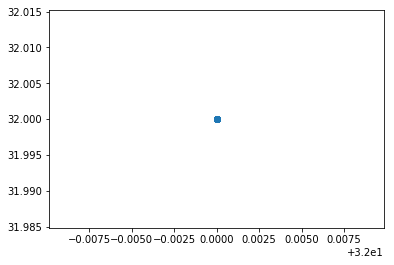

In [13]:
plt.scatter(sizesX,sizesY)

700

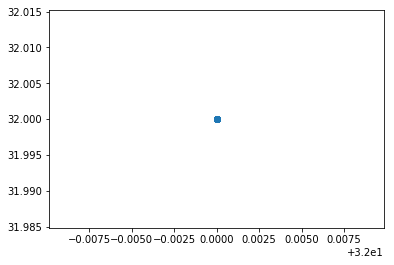

In [14]:
plt.scatter(once_sizesX,once_sizesX)

tt = np.array(once_sizesX)
len(tt)

In [43]:
len(tt[tt < ])


259

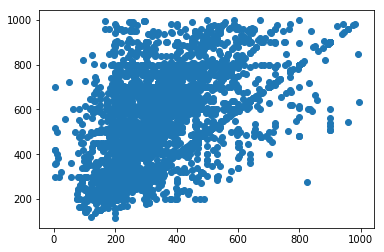

In [44]:
plt.scatter(small_sizesX,small_sizesY)

In [30]:
x = np.random.rand(100)*4.0-2.0
y = np.random.rand(100)*4.0-2.0
z = x*np.exp(-x**2-y**2)
X1 = np.array(small_sizesX)
Y1 = np.array(small_sizesY)

In [31]:
# use RBF
rbf = Rbf(x, y, z, epsilon=2)
ZI = rbf(X1, Y1)

ValueError: not enough values to unpack (expected 2, got 1)

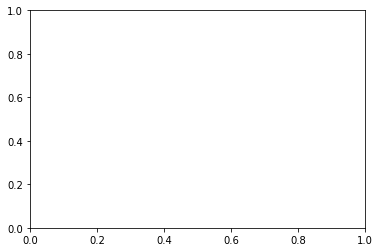

In [32]:
# plot the result
plt.subplot(1, 1, 1)
plt.pcolor(XI, YI, ZI, cmap=cm.jet)
plt.scatter(x, y, 100, z, cmap=cm.jet)
plt.title('RBF interpolation - multiquadrics')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.colorbar()